In [31]:
import os
import random

import numpy as np
import torch
from skimage.io import imread
from torch.utils.data import Dataset

from utils import crop_sample, pad_sample, resize_sample, normalize_volume


class BrainSegmentationDataset(Dataset):
    """Brain MRI dataset for FLAIR abnormality segmentation"""

    in_channels = 1
    out_channels = 1

    def __init__(
        self,
        images_dir,
        transform=None,
        image_size=256,
        subset="train",
        random_sampling=True,
        validation_cases=2,
        seed=42,
    ):
        assert subset in ["all", "train", "validation"]

        # read images
        volumes = {}
        masks = {}
        test = True
        print("reading {} images...".format(subset))
        for (dirpath, dirnames, filenames) in os.walk(images_dir):
            image_slices = []
            mask_slices = []
            for filename in sorted(
                filter(lambda f: ".tif" in f, filenames),
                key=lambda x: int(x.split(".")[-2].split("_")[4]),
            ):
                filepath = os.path.join(dirpath, filename)
                if "mask" in filename:
                    mask_slices.append(imread(filepath, as_gray=True))
                else:
                    image_slices.append(imread(filepath))
                if (test):
                    print(imread(filepath).shape)
                    if "mask" in filename:
                        test=False
            test = True
            if len(image_slices) > 0:
                patient_id = dirpath.split("/")[-1]
                volumes[patient_id] = np.array(image_slices[1:-1])
                masks[patient_id] = np.array(mask_slices[1:-1])
        print(volumes.keys())
        print(masks.keys())
        print(volumes["TCGA_CS_4943_20000902"].shape)
        print(volumes["TCGA_CS_4943_20000902"].dtype)
        print(type(volumes["TCGA_CS_4943_20000902"]))
        print(volumes["TCGA_CS_4943_20000902"][0].shape)
        
        
        


In [32]:
valid = BrainSegmentationDataset(
    images_dir="/home/mhonchar/Documents/brain-segmentation-pytorch/kaggle_dataset_short/kaggle_3m",
    subset="validation",
    image_size=256,
    random_sampling=False,
)

reading validation images...
(256, 256)
(256, 256, 3)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
dict_keys(['TCGA_CS_4943_20000902', 'TCGA_CS_5393_19990606', 'TCGA_CS_4941_19960909', 'TCGA_CS_4944_20010208', 'TCGA_CS_4942_19970222'])
dict_keys(['TCGA_CS_4943_20000902', 'TCGA_CS_5393_19990606', 'TCGA_CS_4941_19960909', 'TCGA_CS_4944_20010208', 'TCGA_CS_4942_19970222'])
(18, 256, 256, 3)
uint8
<class 'numpy.ndarray'>
(256, 256, 3)


In [31]:
# imports.
import nibabel as nib
import numpy as np
import os
from matplotlib import pyplot as plt
# import eval_utils

In [36]:
# paths.
isles_data_dir = 'dataset_isles22_short/'
example_case = 1
amount_of_cases = 5
for case_number in range(amount_of_cases):
    
    # Set images path.
    img_lable = 'sub-strokecase{}'.format("%04d" %case_number)
    dwi_path = os.path.join(isles_data_dir, 'rawdata', 'sub-strokecase{}'.format("%04d" %case_number), 'ses-0001',
                        'sub-strokecase{}_ses-0001_dwi.nii.gz'.format("%04d" % case_number))
    adc_path = dwi_path.replace('dwi', 'adc')
    # flair_path = dwi_path.replace('dwi', 'flair')
    mask_path = dwi_path.replace('rawdata', 'derivatives').replace('dwi', 'msk')
    dwi_image = nib.load(dwi_path).get_fdata()
    adc_image = nib.load(adc_path).get_fdata()
    # flair_image = nib.load(flair_path).get_fdata()
    mask_image = nib.load(mask_path).get_fdata()

In [ ]:
volumes = {}
masks = {}
print("reading {} images...".format(subset))
for (dirpath, dirnames, filenames) in os.walk(images_dir):
    image_slices = []
    mask_slices = []
    for filename in sorted(
        filter(lambda f: ".tif" in f, filenames),
        key=lambda x: int(x.split(".")[-2].split("_")[4]),
    ):
        filepath = os.path.join(dirpath, filename)
        if "mask" in filename:
            mask_slices.append(imread(filepath, as_gray=True))
        else:
            image_slices.append(imread(filepath))
    if len(image_slices) > 0:
        patient_id = dirpath.split("/")[-1]
        volumes[patient_id] = np.array(image_slices[1:-1])
        masks[patient_id] = np.array(mask_slices[1:-1])

In [37]:
# Load image data.
dwi_image = nib.load(dwi_path).get_fdata()
adc_image = nib.load(adc_path).get_fdata()
# flair_image = nib.load(flair_path).get_fdata()
mask_image = nib.load(mask_path).get_fdata()

In [55]:
print("DWI")
print(dwi_image.shape)
print(dwi_image.dtype)

print("ADC")
print(adc_image.shape)
print(adc_image.dtype)

# a = adc_image.reshape((1,112,112,73))
# b = dwi_image.reshape((1,112,112,73))

# # res_image = np.dstack((adc_image, dwi_image))
# res_image = np.concatenate(a, b, axis=2)
# print(type(res_image))
# print(res_image.shape)

ph = np.ones((resized.shape[0], resized.shape[1], 1), dtype='uint8')
ph[:,:,0] = resized


DWI
(112, 112, 73)
float64
ADC
(112, 112, 73)
float64


TypeError: Argument given by name ('axis') and position (2)

In [42]:
print("DWI")
print(dwi_image.shape)
print(dwi_image.dtype)

print("ADC")
print(adc_image.shape)
print(adc_image.dtype)

print("FLAIR")
print(flair_image.shape)
print(flair_image.dtype)

print("MASK")
print(mask_image.shape)
print(mask_image.dtype)

DWI
(112, 112, 73)
float64
ADC
(112, 112, 73)
float64
FLAIR
(281, 352, 352)
float64
MASK
(112, 112, 73)
float64


In [3]:
import os
import random

import numpy as np
import nibabel as nib

import torch
from skimage.io import imread
from torch.utils.data import Dataset

from utils import crop_sample, pad_sample, resize_sample, normalize_volume

in_channels = 3
out_channels = 1

# images_dir="dataset_isles22/rawdata/"
images_dir="dataset_isles22_short/"

transform=None,
image_size=256,
subset="all",
random_sampling=True,
validation_cases=10,
seed=42,


In [15]:

volumes = {}
masks = {}
adc_paths =[]
dwi_paths = []
flair_paths = []
mask_paths = []
print("reading {} images...".format(subset))
for (dirpath, dirnames, filenames) in os.walk(images_dir):
    for filename in sorted(
        filter(lambda f: ".nii.gz" in f, filenames),
        key=lambda x: int(x.split("_")[0][-4:]),
    ):
        filepath = os.path.join(dirpath, filename)
        if "adc" in filename:
            adc_paths.append(filepath)
            print(filepath)
        elif "dwi" in filename:
            dwi_paths.append(filepath)
            print(filepath)
        elif "flair" in filename:
            flair_paths.append(filepath)
            print(filepath)
        elif "msk" in filename:
            mask_paths.append(filepath)
            print(filepath)
                
                    
adc_paths.sort()
dwi_paths.sort()
flair_paths.sort()
mask_paths.sort()
for i in range(len(adc_paths)):
    raw_adc_image = nib.load(adc_paths[i]).get_fdata()
    raw_dwi_image = nib.load(dwi_paths[i]).get_fdata()
    raw_mask_image = nib.load(mask_paths[i]).get_fdata()

    transformed_adc = np.transpose(raw_adc_image, (2, 0, 1))
    transformed_dwi = np.transpose(raw_dwi_image, (2, 0, 1))
    transformed_mask = np.transpose(raw_mask_image, (2, 0, 1))

    combined_volume = np.stack((transformed_adc, transformed_dwi), axis=-1)
    print(i)
    case_id = adc_paths[i].split("/")[2]
    volumes[case_id] = np.array(combined_volume[10:-10])
    masks[case_id] = np.array(transformed_mask[10:-10])



reading ('all',) images...
dataset_isles22_short/rawdata/sub-strokecase0024/ses-0001/sub-strokecase0024_ses-0001_dwi.nii.gz
dataset_isles22_short/rawdata/sub-strokecase0024/ses-0001/sub-strokecase0024_ses-0001_flair.nii.gz
dataset_isles22_short/rawdata/sub-strokecase0024/ses-0001/sub-strokecase0024_ses-0001_adc.nii.gz
dataset_isles22_short/rawdata/sub-strokecase0021/ses-0001/sub-strokecase0021_ses-0001_dwi.nii.gz
dataset_isles22_short/rawdata/sub-strokecase0021/ses-0001/sub-strokecase0021_ses-0001_flair.nii.gz
dataset_isles22_short/rawdata/sub-strokecase0021/ses-0001/sub-strokecase0021_ses-0001_adc.nii.gz
dataset_isles22_short/rawdata/sub-strokecase0022/ses-0001/sub-strokecase0022_ses-0001_adc.nii.gz
dataset_isles22_short/rawdata/sub-strokecase0022/ses-0001/sub-strokecase0022_ses-0001_dwi.nii.gz
dataset_isles22_short/rawdata/sub-strokecase0022/ses-0001/sub-strokecase0022_ses-0001_flair.nii.gz
dataset_isles22_short/rawdata/sub-strokecase0019/ses-0001/sub-strokecase0019_ses-0001_dwi.nii.

In [13]:
masks.keys()

dict_keys(['sub-strokecase0001', 'sub-strokecase0002', 'sub-strokecase0003', 'sub-strokecase0004', 'sub-strokecase0005'])

In [9]:

def normalize_to_uint8(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)

    normalized_volume = ((volume - min_val) / (max_val - min_val)) * 255
    normalized_volume = normalized_volume.astype(np.uint8)
    return volume


# assert subset in ["all", "train", "validation"]

# read images
# images_dir="kaggle_dataset/kaggle_3m/"
adc_paths =[]
dwi_paths = []
flair_paths = []
mask_paths = []
fs = []
volumes = {}
masks = {}
print("reading {} images...".format(subset))
for (dirpath, dirnames, filenames) in os.walk(images_dir):
    image_slices = []
    mask_slices = []
    # display(filenames)
    for filename in sorted(
        # filter(lambda f: ".tif" in f, filenames),
        filter(lambda f: ".nii.gz" in f, filenames),
        key=lambda x: int(x.split("_")[0][-4:]),
    ):
        # print(filename)
        filepath = os.path.join(dirpath, filename)
        fs.append(filepath)
        if "adc" in filename:
            adc_paths.append(filepath)
        elif "dwi" in filename:
            dwi_paths.append(filepath)
        elif "flair" in filename:
            flair_paths.append(filepath)
        elif "msk" in filename:
            mask_paths.append(filepath)
    adc_paths.sort()
    dwi_paths.sort()
    flair_paths.sort()
    mask_paths.sort()

    for i in range(len(adc_paths)):
        raw_adc_image = nib.load(adc_paths[i]).get_fdata()
        raw_dwi_image = nib.load(dwi_paths[i]).get_fdata()
        raw_mask_image = nib.load(mask_paths[i]).get_fdata()

        transformed_adc = np.transpose(raw_adc_image, (2, 0, 1))
        transformed_dwi = np.transpose(raw_dwi_image, (2, 0, 1))
        transformed_mask = np.transpose(raw_mask_image, (2, 0, 1))

        normalized_adc = normalize_to_uint8(transformed_adc)
        normalized_dwi = normalize_to_uint8(transformed_dwi)
        normalized_mask = normalize_to_uint8(transformed_mask)

        combined_volume = np.stack((normalized_adc, normalized_dwi), axis=-1)
        
        case_id = adc_paths[0].split("/")[2]
        volumes[case_id] = np.array(combined_volume[10:-10])
        masks[case_id] = np.array(normalized_mask[10:-10])

    # if len(image_slices) > 0:
    #     patient_id = dirpath.split("/")[-1]
    #     volumes[patient_id] = np.array(image_slices[1:-1])
    #     masks[patient_id] = np.array(mask_slices[1:-1])


# patients = sorted(volumes)
fs.sort()
# for i in fs:
#     print(i)
    
adc_images.sort()
for i in adc_images:
    print(i)
dwi_images.sort()
for i in dwi_images:
    print(i)
flair_images.sort()
for i in flair_images:
    print(i)
mask_images.sort()
for i in mask_images:
    print(i)
# print(fs.type)

    
    


reading ('all',) images...


IndexError: list index out of range

In [26]:
import nibabel as nib

adc_image = nib.load(adc_images[0]).get_fdata()
# flair_image = nib.load(flair_path).get_fdata()
mask_image = nib.load(mask_images[0]).get_fdata()


In [28]:
mask_image.shape

(112, 112, 73)


'''
# select cases to subset
if not subset == "all":
    random.seed(seed)
    validation_patients = random.sample(self.patients, k=validation_cases)
    if subset == "validation":
        self.patients = validation_patients
    else:
        self.patients = sorted(
            list(set(self.patients).difference(validation_patients))
        )

print("preprocessing {} volumes...".format(subset))
# create list of tuples (volume, mask)
self.volumes = [(volumes[k], masks[k]) for k in self.patients]

print("cropping {} volumes...".format(subset))
# crop to smallest enclosing volume
self.volumes = [crop_sample(v) for v in self.volumes]

print("padding {} volumes...".format(subset))
# pad to square
self.volumes = [pad_sample(v) for v in self.volumes]

print("resizing {} volumes...".format(subset))
# resize
self.volumes = [resize_sample(v, size=image_size) for v in self.volumes]

print("normalizing {} volumes...".format(subset))
# normalize channel-wise
self.volumes = [(normalize_volume(v), m) for v, m in self.volumes]

# probabilities for sampling slices based on masks
self.slice_weights = [m.sum(axis=-1).sum(axis=-1) for v, m in self.volumes]
self.slice_weights = [
    (s + (s.sum() * 0.1 / len(s))) / (s.sum() * 1.1) for s in self.slice_weights
]

# add channel dimension to masks
self.volumes = [(v, m[..., np.newaxis]) for (v, m) in self.volumes]

print("done creating {} dataset".format(subset))

# create global index for patient and slice (idx -> (p_idx, s_idx))
num_slices = [v.shape[0] for v, m in self.volumes]
self.patient_slice_index = list(
    zip(
        sum([[i] * num_slices[i] for i in range(len(num_slices))], []),
        sum([list(range(x)) for x in num_slices], []),
    )
)
'''

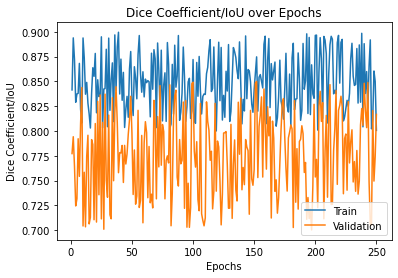

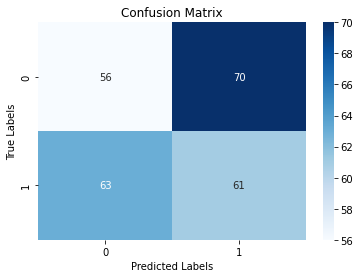

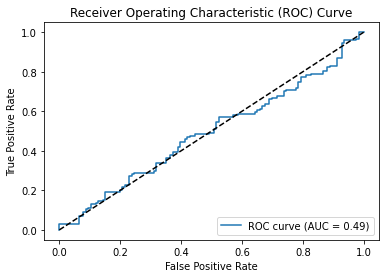

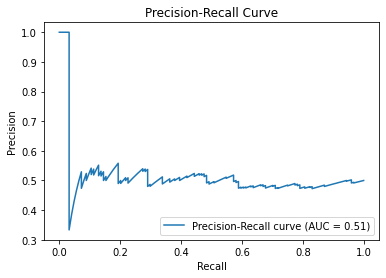

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import numpy as np

# Example input arrays for the results
dice_values_train = np.random.uniform(0.8, 0.9, size=250)
dice_values_val = np.random.uniform(0.7, 0.85, size=250)
true_labels = np.random.randint(0, 2, size=250)
predicted_labels = np.random.randint(0, 2, size=250)
predicted_scores = np.random.uniform(0.5, 1, size=250)

# Plot Dice coefficient/IoU values over epochs
epochs = np.arange(1, 251)
plt.plot(epochs, dice_values_train, label='Train')
plt.plot(epochs, dice_values_val, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient/IoU')
plt.title('Dice Coefficient/IoU over Epochs')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(true_labels, predicted_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compute precision, recall, and AUC-PR
precision, recall, _ = precision_recall_curve(true_labels, predicted_scores)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [2]:
%pip install seaborn

     |████████████████████████████████| 292 kB 1.4 MB/s            
Note: you may need to restart the kernel to use updated packages.
